In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("C:/Users/hp5cd/Downloads/heart_disease_health_indicators_BRFSS2015.csv")

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (253680, 22)


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:

X = df.drop(columns=["HeartDiseaseorAttack"])
y = df["HeartDiseaseorAttack"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (177576, 21)
Test set size: (76104, 21)


In [4]:

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

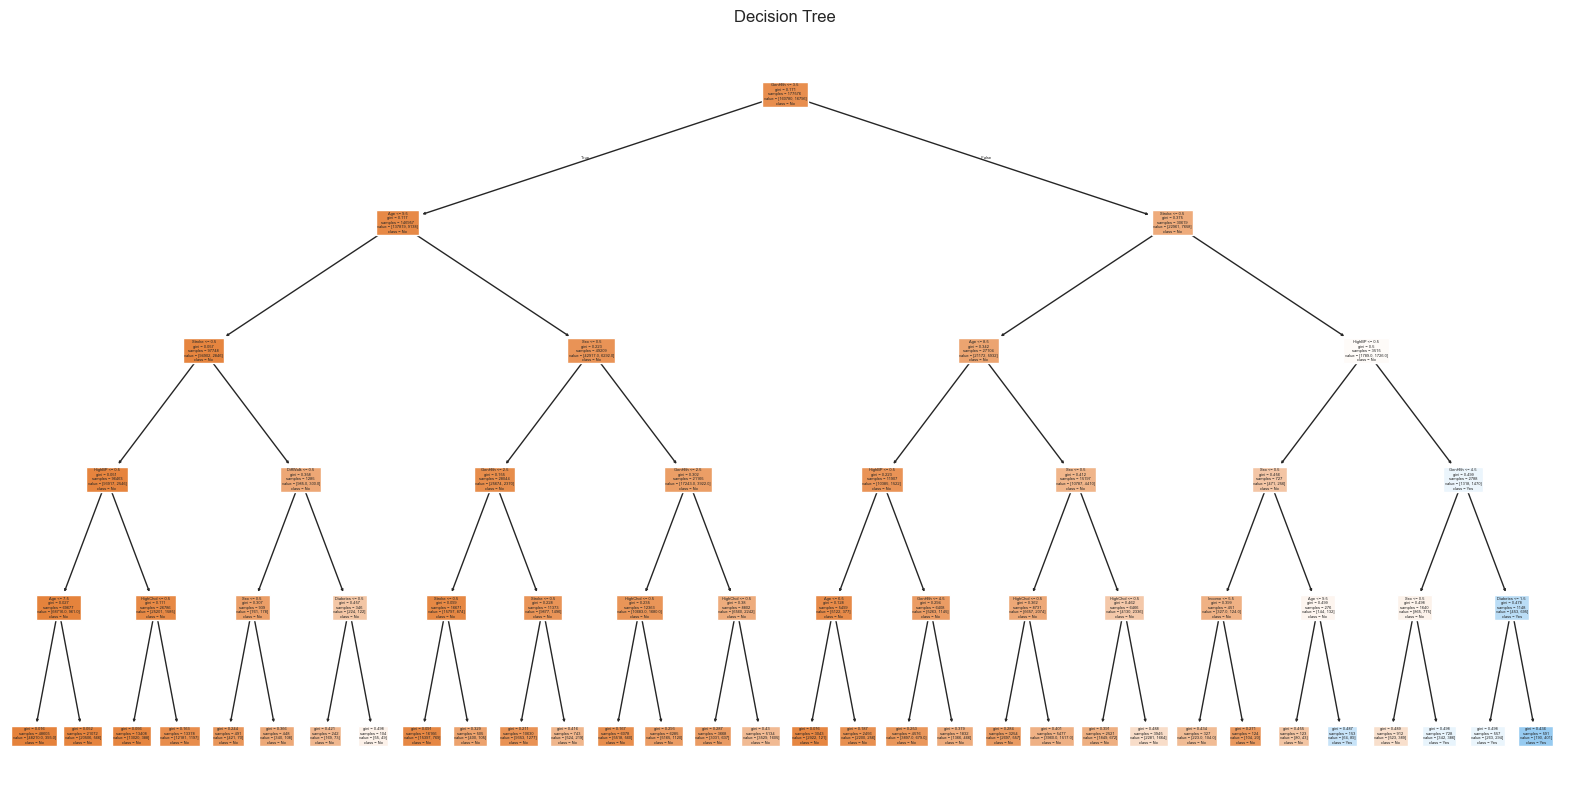

In [5]:

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree")
plt.show()


In [6]:

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

print("Decision Tree Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_test_pred))


Decision Tree Train Accuracy: 0.907166508987701
Decision Tree Test Accuracy: 0.9080468832124461


In [7]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
# 📈 Step 8: Evaluate Random Forest
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

print("Random Forest Train Accuracy:", accuracy_score(y_train, rf_train_pred))
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_test_pred))


Random Forest Train Accuracy: 0.9961593909086813
Random Forest Test Accuracy: 0.9039340901923684


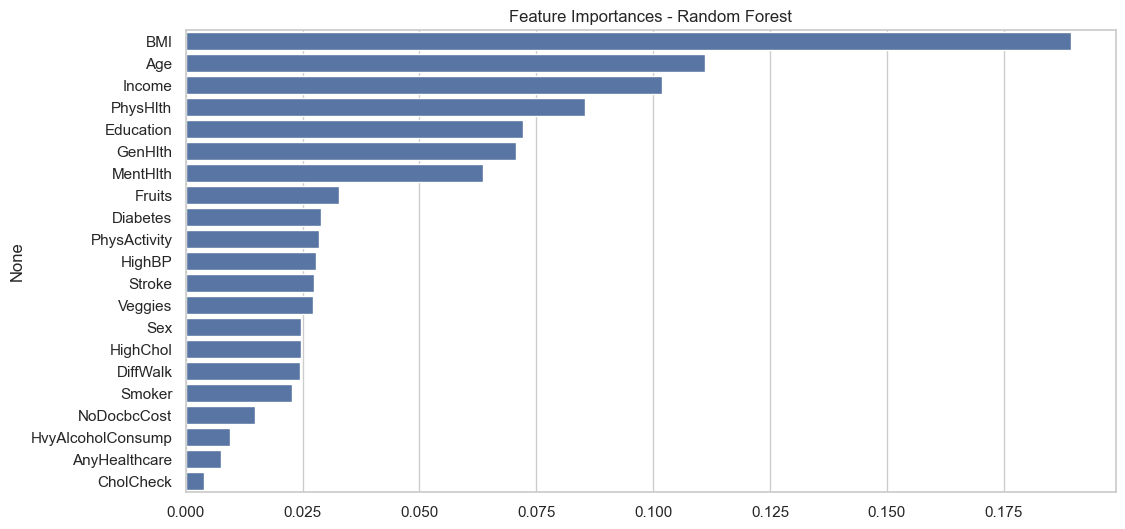

In [9]:
# 🔍 Step 9: Feature Importance Plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importances - Random Forest")
plt.show()


In [13]:
from sklearn.metrics import classification_report
rf_test_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_test_pred))
rf_test_pred = rf_model.predict(X_test)


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     69007
         1.0       0.44      0.12      0.18      7097

    accuracy                           0.90     76104
   macro avg       0.68      0.55      0.57     76104
weighted avg       0.87      0.90      0.88     76104

